#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the Fashion Minst dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: Fashion MNIST dataset

We will use the Fashion MNIST dataset, a dataset of Zalando's articles. Each sample is a 28x28 pixels grayscale image, associated with a label from 10 classes:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Each pixel intensity is represented by a uint8 (byte) from 0 to 255.
We will divide the dataset in training, validation and test set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of the deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one). Therefore we use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims) to transform each image from a matrix to a 3-dimensional tensor. Finaly we have to normalize the input data.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


4423680/4422102 [==============================] - 0s 0us/step


Let's take a look at a sample of the images in the dataset:

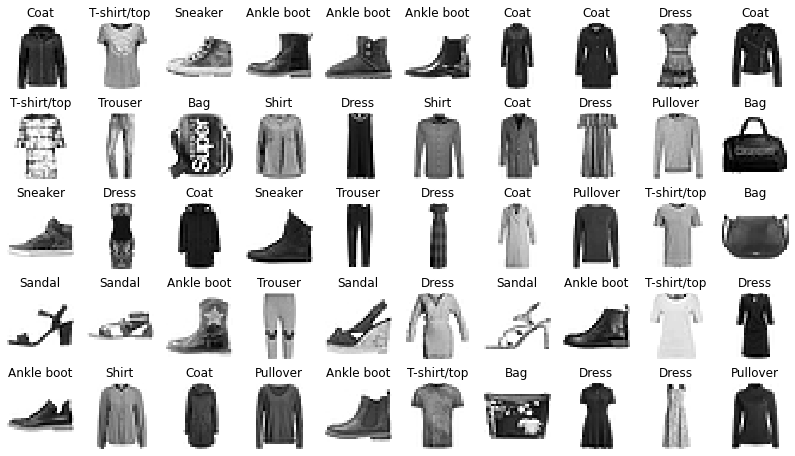

In [3]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [4]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

mean=X_train.mean(axis=(0), keepdims=True)
std=X_train.std(axis=(0), keepdims=True)
X_train = (X_train - mean) / std #[TO COMPLETE]
X_valid = (X_valid - mean) / std #[TO COMPLETE]
X_test = (X_test - mean) / std #[TO COMPLETE]


#Add one dimension to manage the channel
X_train=tf.expand_dims(X_train, 3) 
X_valid=tf.expand_dims(X_valid, 3) 
X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 22s 49ms/step - loss: 0.9881 - accuracy: 0.6869 - val_loss: 0.5100 - val_accuracy: 0.8260
Epoch 2/10
430/430 [==============================] - 21s 48ms/step - loss: 0.5028 - accuracy: 0.8261 - val_loss: 0.4482 - val_accuracy: 0.8538
Epoch 3/10
430/430 [==============================] - 21s 48ms/step - loss: 0.4470 - accuracy: 0.8456 - val_loss: 0.4090 - val_accuracy: 0.8654
Epoch 4/10
430/430 [==============================] - 21s 48ms/step - loss: 0.4084 - accuracy: 0.8593 - val_loss: 0.3985 - val_accuracy: 0.8678
Epoch 5/10
430/430 [==============================] - 21s 48ms/step - loss: 0.3876 - accuracy: 0.8668 - val_loss: 0.3829 - val_accuracy: 0.8716
Epoch 6/10
430/430 [==============================] - 21s 48ms/step - loss: 0.3710 - accuracy: 0.8700 - val_loss: 0.3727 - val_accuracy: 0.8744
Epoch 7/10
430/430 [==============================] - 21s 48ms/step - loss: 0.3550 - accuracy: 0.8771 - val_loss: 0.3654 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 0.3604 - accuracy: 0.8744
accuracy: 87.44%


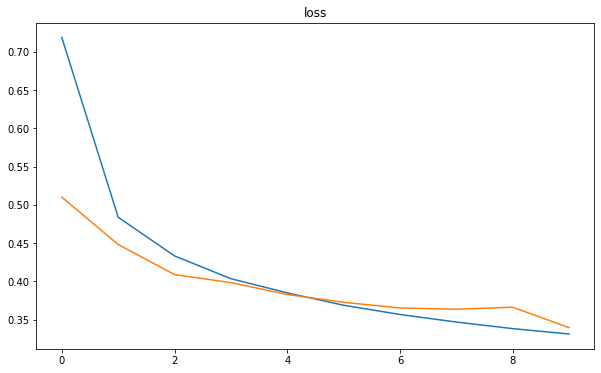

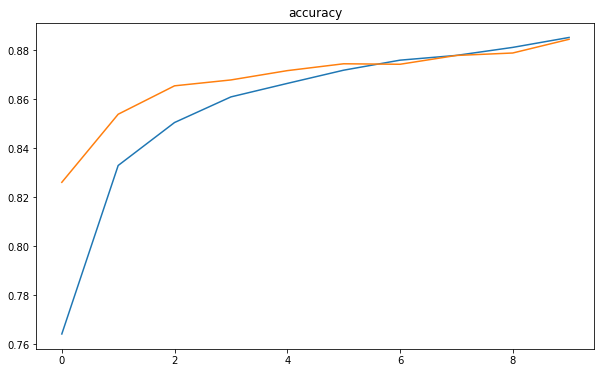

In [8]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

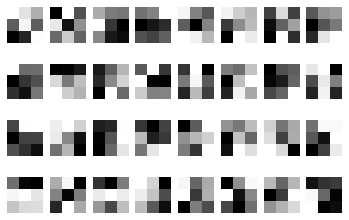

In [9]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
____________________________________________________

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   32(3x3 +1) where
32 is the number of filters, while the 
kernel size is 3x3=9 +1(bias)
2.   since we apply different filters. Especially the fact that we apply more filetrs in the second net decrease the dimension of the tensor and as result we a smaller result w. the flatten layer, that  means way less connections to the dense layer. Indeed the transition from flatten to dense is the most expensive one (in terms of number of params)

Let's now train our deep CNN.

Epoch 1/10
430/430 [==============================] - 24s 55ms/step - loss: 1.4377 - accuracy: 0.5310 - val_loss: 0.6426 - val_accuracy: 0.7652
Epoch 2/10
430/430 [==============================] - 23s 54ms/step - loss: 0.6228 - accuracy: 0.7727 - val_loss: 0.5574 - val_accuracy: 0.8044
Epoch 3/10
430/430 [==============================] - 23s 54ms/step - loss: 0.5495 - accuracy: 0.7991 - val_loss: 0.4958 - val_accuracy: 0.8250
Epoch 4/10
430/430 [==============================] - 24s 55ms/step - loss: 0.4993 - accuracy: 0.8215 - val_loss: 0.4693 - val_accuracy: 0.8366
Epoch 5/10
430/430 [==============================] - 24s 55ms/step - loss: 0.4772 - accuracy: 0.8304 - val_loss: 0.4629 - val_accuracy: 0.8428
Epoch 6/10
430/430 [==============================] - 24s 55ms/step - loss: 0.4574 - accuracy: 0.8374 - val_loss: 0.4673 - val_accuracy: 0.8382
Epoch 7/10
430/430 [==============================] - 24s 55ms/step - loss: 0.4390 - accuracy: 0.8462 - val_loss: 0.4416 - val_accuracy:

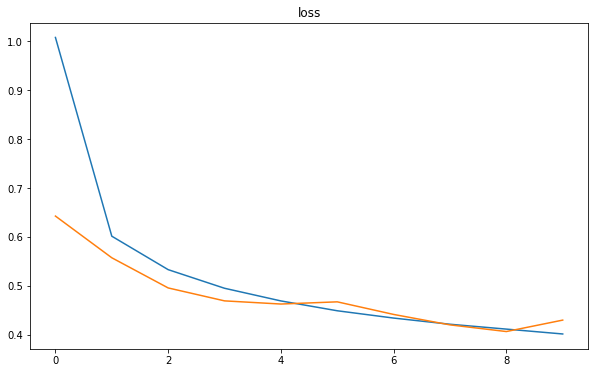

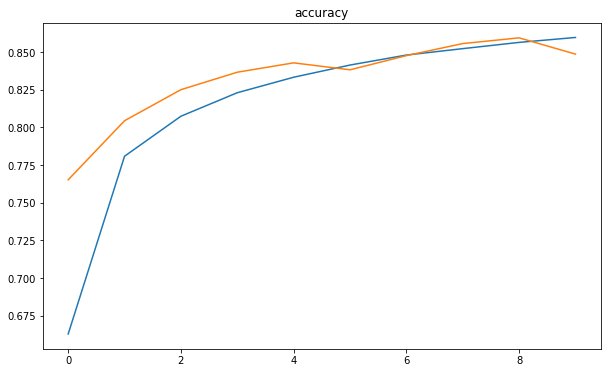

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

another test

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       131328    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 256)         262400    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 128)        

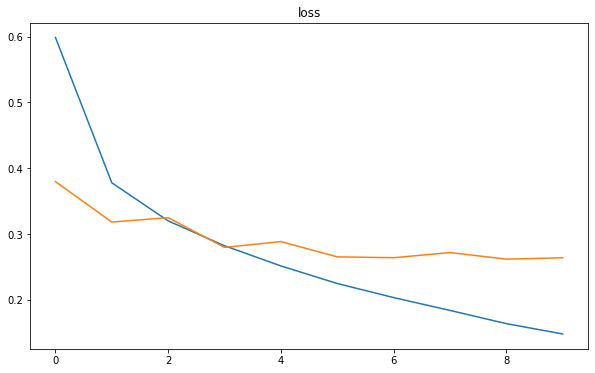

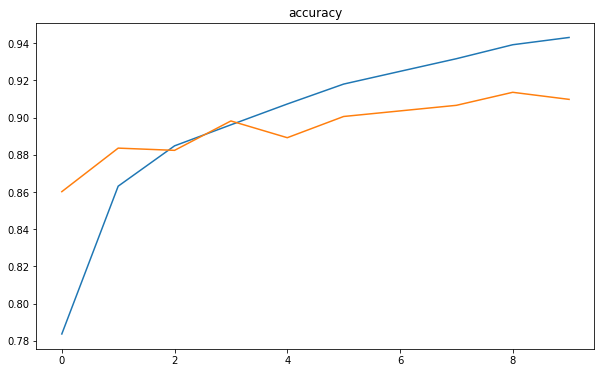

In [12]:
#@title Default title text
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=256, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=[2,2], activation='relu'),
    keras.layers.Dropout(.3, input_shape=(2,)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
**The best model that I found** ...is the following

model = keras.models.Sequential([

    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=256, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=[2,2], activation='relu'),
    keras.layers.Dropout(.3, input_shape=(2,)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

The achieved accuracy in the test set is ...90.67

**Discussion**:

The main changes regards the filters dimensions and the optimized used (adam instead of SGD). I have also tried some modifications of the model used, w. different activation functions, kernel size and filters dimensions (mantaining the "ratio" between them) but this one is the only one that reached 90% accuracy in the test evaluation. 
At the end I introduced a dropOut layer w- prob 0.3, that helped to slow down the overfitting. 

Besides, I tested also other models: ( + Discussion) 
* a model with increasing filter size(16 the first one, 32 the second, 64, 128, 256 -than stopped)
* a model with decreasing filter size(from to 256 to lower)
* varius combination of filters, but everyone was performing very well on the train but then overfit, reaching a maximum accuracy between 87 and 89 %. 
* tested also w and w.out maxpooling, or other pooling but nothing better happend (for what i see also in other personal CNN tests the best pooling is the max, most of the time)

(i also tested a few different values for the number of epochs, batch_size but didn't see any better results than the 90.67% obtained with the choosen model. 
( I haven't tried, but I think it wouldn't work, to use a more comples moodel (w. mmany more layers) and use the gpu (to avoid too high execution time), since i belive that a more complex model would just lead to overfit. without improve significantly the performance. 



